<h2>Intoduction</h2>
<br>
This notebook is analyzing accuracies on test data of traines models. We would like to analyze accuracy, test hypothesis, whether all networks have same results and if we have only one best network. We will be using anova and confidence itnervals.

### Load and data preprocessing section

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as st
import scipy

#### Get list of files

In [2]:
predictions_folder_path = pathlib.Path(r".\inputs\Predictions")

list_of_files = {
    "deeplabv3":predictions_folder_path / r"deep_lab_v3_512x512_all_data_ep14\2303131721_per_img.log",
    "segnetwithresnet50":predictions_folder_path / r"resnet50_segnet_512x512_all_data_ep15\2303131721_per_img.log",
    "unetwithresnet50":predictions_folder_path / r"resnet50_unet_512x512_all_data_ep18\2303131724_per_img.log",
    "unetsmall":predictions_folder_path / r"unet_small_512x512_all_data_ep40\2303131733_per_img.log",
    "unetpredefined":predictions_folder_path / r"unet2_512x512_all_data_ep28\2303131722_per_img.log",
    "segnetwithvgg":predictions_folder_path / r"vgg_segnet_512x512_all_data_ep99\2303131735_per_img.log",
    "unetwithvgg":predictions_folder_path / r"vgg_unet_512x512_all_data_ep26\2303131739_per_img.log"
}

#### Read all stats file to get IoU and accuracy

In [3]:
pd_complete_df = pd.DataFrame()
for network_name, file_path in list_of_files.items():
    df_tmp = pd.read_csv(file_path,skiprows=9, delimiter="|")
    df_tmp = df_tmp.drop([0]+list(df_tmp.index)[-3:], axis = 0)
    df_tmp.columns = df_tmp.columns.str.strip()
    pd_complete_df[f"{network_name}_accuracy"] = df_tmp["accuracy"]
pd_complete_df

,deeplabv3_accuracy,segnetwithresnet50_accuracy,unetwithresnet50_accuracy,unetsmall_accuracy,unetpredefined_accuracy,segnetwithvgg_accuracy,unetwithvgg_accuracy
1,0.715,0.608,0.607,0.599,0.637,0.607,0.685
2,0.697,0.640,0.703,0.646,0.614,0.631,0.738
3,0.697,0.600,0.671,0.615,0.614,0.621,0.716
4,0.695,0.651,0.703,0.625,0.621,0.642,0.732
5,0.688,0.671,0.693,0.642,0.613,0.624,0.748
...,...,...,...,...,...,...,...
2627,0.228,0.183,0.171,0.167,0.125,0.095,0.189
2628,0.275,0.223,0.170,0.177,0.125,0.093,0.203
2629,0.325,0.314,0.231,0.271,0.169,0.125,0.268
2630,0.329,0.317,0.248,0.303,0.200,0.152,0.323


#### Visualize results

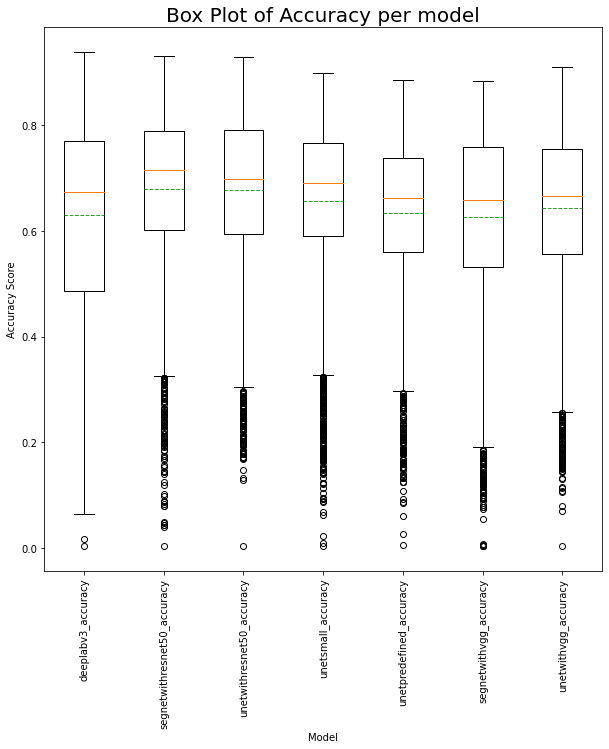

In [4]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Accuracy per model", fontsize= 20)
ax.set

data = []
for column in list(pd_complete_df.columns):
    data.append(pd_complete_df[column])

ax.boxplot(data,
           labels= list(pd_complete_df.columns),
           showmeans= True, 
            meanline =True)

plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=90)
plt.show()

#### Create converted dataframe, where models have their own indexes and accuracies are stacked

In [5]:
acc_columns = list(pd_complete_df.columns)

In [6]:
acc_df = pd.DataFrame(columns =["model","accuracy"])
acc_columns_coversion = []
for acc_column_index, acc_column in enumerate(acc_columns):
    tmp_df = pd.DataFrame(columns =["model","accuracy"])
    tmp_df["accuracy"] = pd_complete_df[acc_column]
    tmp_df["model"] = acc_column_index
    acc_columns_coversion.append({acc_column_index:acc_column})
    acc_df = pd.concat([acc_df,tmp_df], axis = 0)
acc_df

,model,accuracy
1,0,0.715
2,0,0.697
3,0,0.697
4,0,0.695
5,0,0.688
...,...,...
2627,6,0.189
2628,6,0.203
2629,6,0.268
2630,6,0.323


#### Change model name into string

In [7]:
acc_df_char = pd.DataFrame(columns =["model","accuracy"])
acc_columns_coversion_char = []
for acc_column_index, acc_column in enumerate(acc_columns):
    tmp_df = pd.DataFrame(columns =["model","accuracy"])
    tmp_df["accuracy"] = pd_complete_df[acc_column]
    tmp_df["model"] = acc_column
    acc_columns_coversion_char.append({acc_column_index:acc_column})
    acc_df_char = pd.concat([acc_df_char,tmp_df], axis = 0)
acc_df_char

,model,accuracy
1,deeplabv3_accuracy,0.715
2,deeplabv3_accuracy,0.697
3,deeplabv3_accuracy,0.697
4,deeplabv3_accuracy,0.695
5,deeplabv3_accuracy,0.688
...,...,...
2627,unetwithvgg_accuracy,0.189
2628,unetwithvgg_accuracy,0.203
2629,unetwithvgg_accuracy,0.268
2630,unetwithvgg_accuracy,0.323


#### Visualize results using violing plot

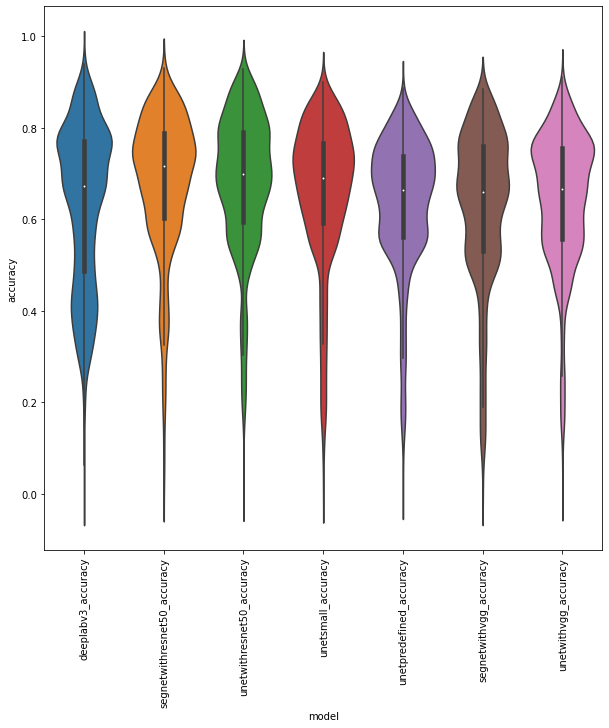

In [8]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
sns.violinplot(x=acc_df_char["model"], y=acc_df_char["accuracy"])
plt.xticks(rotation=90)
plt.show()

#### Visualize histogram of accuracies for each network

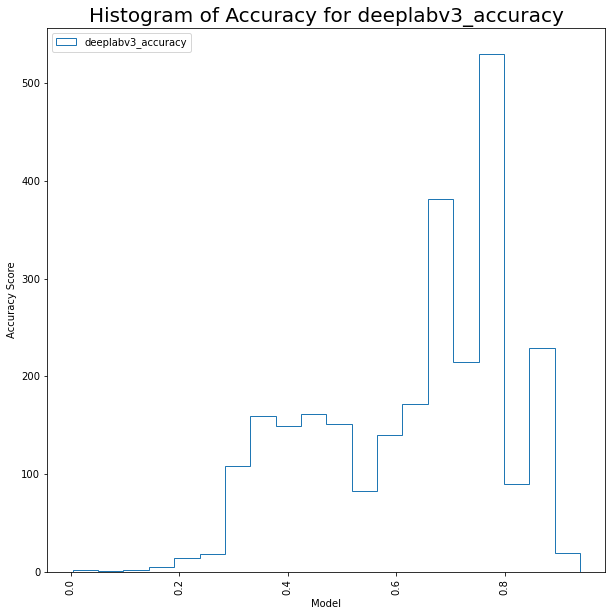

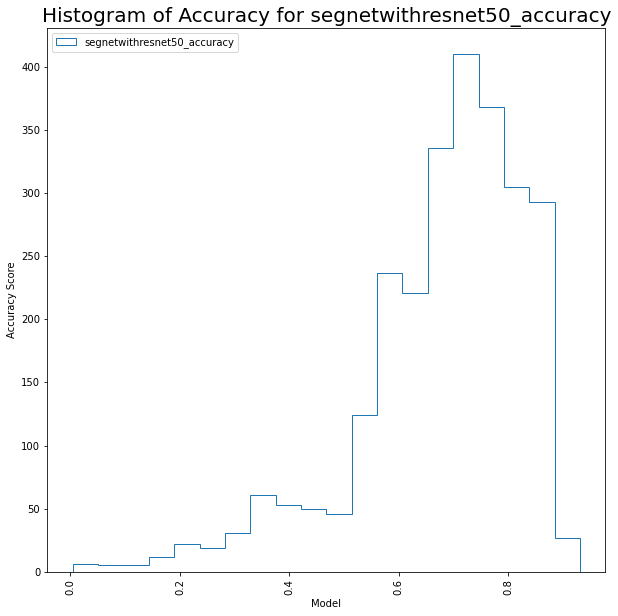

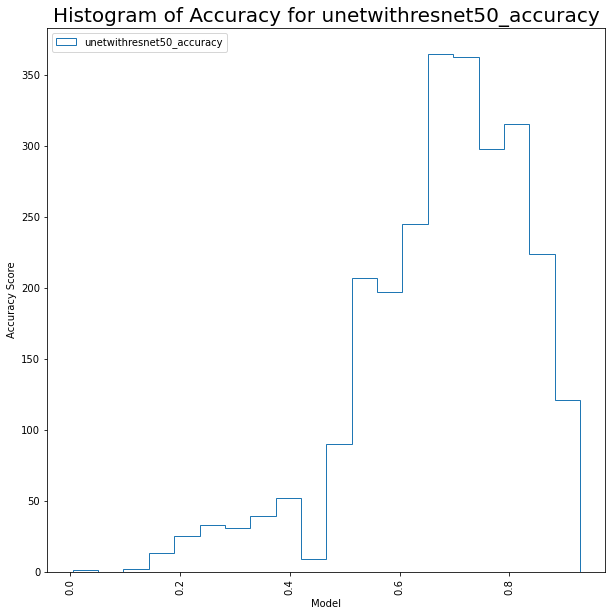

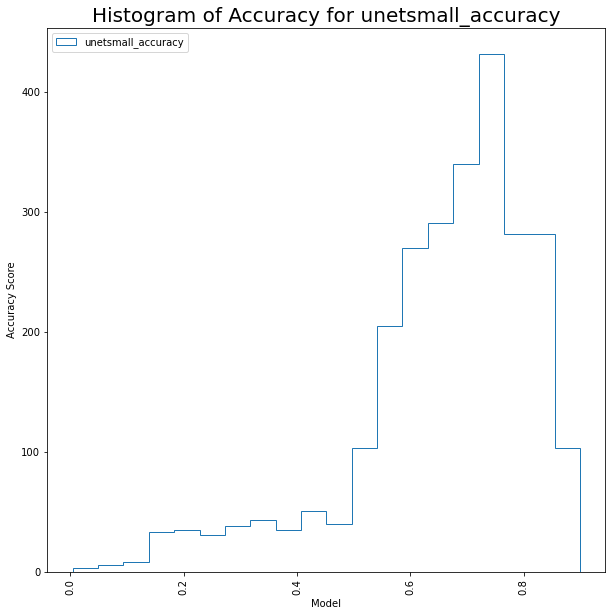

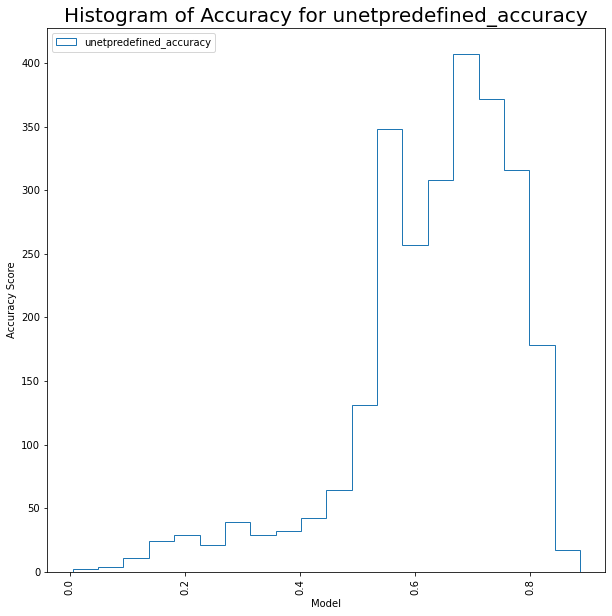

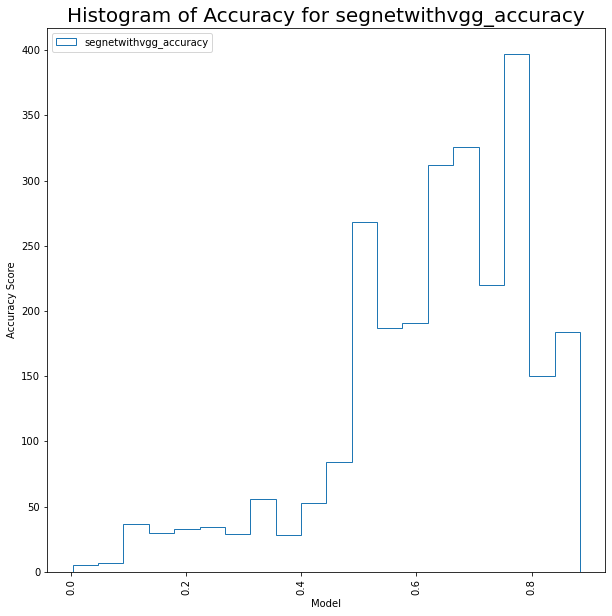

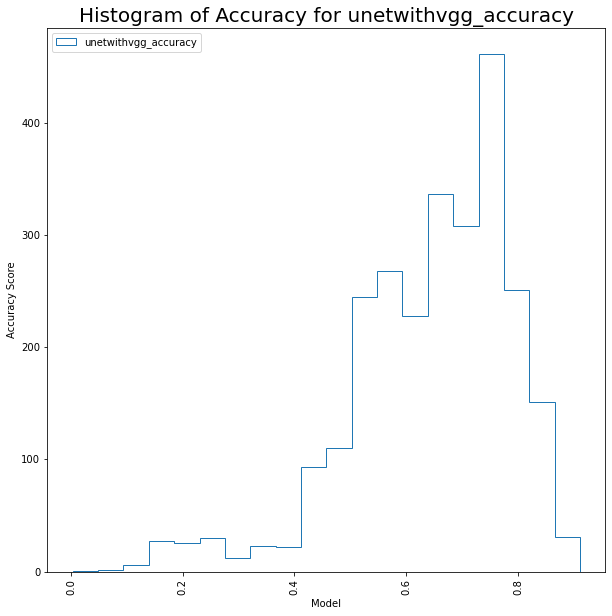

In [9]:
for column in list(pd_complete_df.columns):
    fig = plt.figure(figsize= (10, 10))
    ax = fig.add_subplot(111)

    ax.set_title(f"Histogram of Accuracy for {column}", fontsize= 20)
    ax.set
    tmp_df = pd_complete_df[column]
    ax.hist(tmp_df,bins =20, histtype='step', label = column)
    plt.xlabel("Model")
    plt.ylabel("Accuracy Score")
    plt.xticks(rotation=90)
    plt.legend(loc = 'upper left')
    plt.show()

### Confidence intervals

Lets firstly define what are confidence intervals. We can say that its a range, where lays our value with certain confidence (probability). You can see formula and plot below. 
<img src="imgs/confidence_intervals.png" width=600 />
<i>http://www.stat.yale.edu/Courses/1997-98/101/confint.htm</i>
<br>
<br>
C is the probability. This for gives us the value on the distribution, that equals to the student distribution for selected probability/confidence level.
<br>
We would like to create confidence intervals of mean accuracy for each model with 95% probability or confidence.

In [10]:
# Lets get basic parameters
pd_complete_df_dsc = pd_complete_df.describe()
importance = 0.05
importance = importance/2

In [11]:
# Lets calculate for each model confidence intervals. We only substract delta from mean, which is the value we would like to get. 
mean_intervals_models = []
for column in list(pd_complete_df_dsc.columns):
    pd_complete_df_dsc_model = pd_complete_df_dsc[column]
    mean = pd_complete_df_dsc_model["mean"]
    var = pd_complete_df_dsc_model["std"]**2
    n = pd_complete_df_dsc_model["count"]
    delta = st.t.ppf(1-importance, n-1)*(var/n)**(1/2)
    min_prob = mean - delta
    max_prob = mean + delta
    mean_intervals_models.append({"name":column, "value":min_prob})
    mean_intervals_models.append({"name":column, "value":max_prob})
df_mean_intervals = pd.DataFrame(mean_intervals_models)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'deeplabv3_accuracy'),
  Text(1, 0, 'segnetwithresnet50_accuracy'),
  Text(2, 0, 'unetwithresnet50_accuracy'),
  Text(3, 0, 'unetsmall_accuracy'),
  Text(4, 0, 'unetpredefined_accuracy'),
  Text(5, 0, 'segnetwithvgg_accuracy'),
  Text(6, 0, 'unetwithvgg_accuracy')])

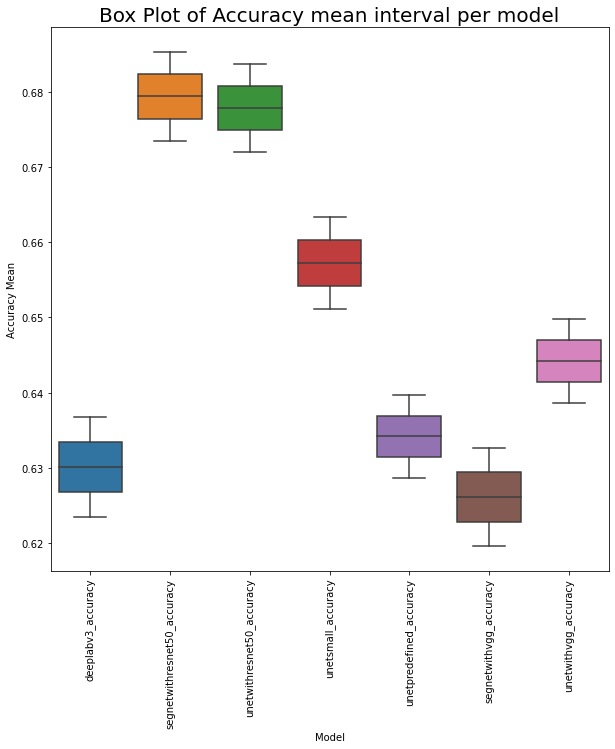

In [12]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Accuracy mean interval per model", fontsize= 20)
sns.boxplot(x='name', y='value', data=df_mean_intervals)
plt.xlabel("Model")
plt.ylabel("Accuracy Mean")
plt.xticks(rotation=90)

And here we have results. We can see, that models using resnet50 for downsampling seems to have and advantage against other models

### Anova

#### Firstly lets describe how anova works and its formula.

Anova is analyzing differencies between "Mean square between groups", which indicates error of estimation between different goups and "Mean square withing groups", which indicates error withing groups. By dividing it, we are comparing error between groupd and error within groups. 


<img src="imgs/anova_formula.png" width=600 />
<i>https://towardsdatascience.com/anova-explained-for-beginners-with-the-bachelorette-tv-show-8503c4aaba10</i>

Lets explain the steps, that will lead to anova calculation:
<ul>
  <li>SSb - Firstly we calculate sum of square errors among groups, that means average of each group minus total average squared</li>
  <li>SSw - Then we calculate sum of square errors within groups, that means we take every measurement minus group average squared</li>
  <li>MSb - We take previous calculation of SSb and divide it by number of groups minus 1</li>
  <li>MSw - We take previous calculation of SSw and divide it by number of measurement minus number of groups</li>
  <li>MSt - We will define here one more parameter which is mean square total.Its calculated as as each measurement minus total average. There is one importat relationship we will use later. MSt - mean square total = MSb + MSw</li>
  <li>F stats - Finally we can calculate F statistics, which is only ration of MSb and MSw, we calculated before</li>
  <li>P-Value - As F statistic is unitless, we need to use F distribution to convert it into probability, so we can compare it to alpha, which is significance level</li>
</ul>
<br>
<b>Lets move to our first test: </b>
<br>
Even Though we have seen results of confidence intervals, we would like to test again, whether all models are same or not. 
<div>
H0 - All models have same results
<div>
H1 - Models are having different results

In [13]:
# Firstly get values we will need for calculation
number_of_records_per_group = pd_complete_df.shape[0]
number_of_groups = acc_df["model"].unique()
number_of_groups = len(number_of_groups)
number_of_records = acc_df.shape[0]
total_mean = acc_df["accuracy"].mean()
models_mean = pd_complete_df.mean()

In [14]:
# Find MSb ---Sym
MSb = 0
for model_mean in models_mean:
    MSb += ((model_mean-total_mean)**2)*number_of_records_per_group
# MSt ---Sy
MSt = 0
for record_accuracy in acc_df["accuracy"]:
    MSt += (record_accuracy-total_mean)**2
# MSw ---Syv
MSw = MSt-MSb

In [15]:
# Lets calculate F stats
F = (MSb/(number_of_groups-1))/(MSw/(number_of_records-number_of_groups))

In [16]:
# Get p value
p_value = 1- scipy.stats.f.cdf(F, (number_of_groups-1), (number_of_records-number_of_groups))
p_value

1.1102230246251565e-16

alpha = 0.05 
</br>
H0 = p<alpha
</br>
H1 = p>alpha
</br>
<p>
The result is: </p>
<h5>Null hypothesis is rejected</h5>

#### Same calculation only usingi stats library implementation

In [17]:
model = ols('accuracy ~ C(model)', data=acc_df).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     51.67
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           2.05e-63
Time:                        16:50:19   Log-Likelihood:                 7870.7
No. Observations:               18417   AIC:                        -1.573e+04
Df Residuals:                   18410   BIC:                        -1.567e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6301      0.003    204.762

In [19]:
anova_table = sm.stats.anova_lm(model, typ=2) #https://www.r-bloggers.com/2011/03/anova-%e2%80%93-type-iiiiii-ss-explained/
anova_table

,sum_sq,df,F,PR(>F)
C(model),7.724746,6.0,51.67044,2.046097e-63
Residual,458.716731,18410.0,NaN,NaN


alpha = 0.05 
</br>
H0 rejected = p<alpha
</br>
H1 rejected = p>alpha
</br>
<p>
The result is: </p>
<h5>Null hypothesis is rejected</h5>

<h4>Resnet networks to others compare</h4>
Lets move on. We can conclude that models are not the same. On the other hand we have two models, that seems to be better than other models. Lets test, that resnet models are better than others with 95% confidence.
<div>
H0 - All models are having same results
<div>
H1 - Models using resnet are different

In [20]:
resnet_compare_unet = acc_df[(acc_df["model"]==2) | (acc_df["model"]==3)]
model = ols('accuracy ~ C(model)', data=resnet_compare_unet).fit()

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     22.83
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.82e-06
Time:                        16:50:19   Log-Likelihood:                 2301.2
No. Observations:                5262   AIC:                            -4598.
Df Residuals:                    5260   BIC:                            -4585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6778      0.003    222.469

In [22]:
anova_table = sm.stats.anova_lm(model, typ=2) #https://www.r-bloggers.com/2011/03/anova-%e2%80%93-type-iiiiii-ss-explained/
anova_table

,sum_sq,df,F,PR(>F)
C(model),0.557595,1.0,22.828545,0.000002
Residual,128.477252,5260.0,NaN,NaN


alpha = 0.05 
<br>
H0 rejected = p<alpha
<br>
H1 rejected = p>alpha
<br>
<p>
The result is: </p>
<h5>Null hypothesis is rejected</h5>

<h4>Resnet compare</h4>
Lets move on. We can conclude that models are not the same. On the other hand we have two models, that seems to be better than other models. Lets test, that resnet models are better than others with 95% confidence.
<div>
H0 - Resnet models are having same results
<div>
H1 - Resnet models are having different results

In [23]:
resnet_models = acc_df[(acc_df["model"]==1) | (acc_df["model"]==2)]
model = ols('accuracy ~ C(model)', data=resnet_models).fit()

In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1330
Date:                Sun, 22 Oct 2023   Prob (F-statistic):              0.715
Time:                        16:50:19   Log-Likelihood:                 2414.9
No. Observations:                5262   AIC:                            -4826.
Df Residuals:                    5260   BIC:                            -4813.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6794      0.003    227.845

In [25]:
anova_table = sm.stats.anova_lm(model, typ=2) #https://www.r-bloggers.com/2011/03/anova-%e2%80%93-type-iiiiii-ss-explained/
anova_table

,sum_sq,df,F,PR(>F)
C(model),0.003111,1.0,0.132994,0.715362
Residual,123.042107,5260.0,NaN,NaN


alpha = 0.05 
<br>
H0 rejected = p<alpha
<br>
H1 rejected = p>alpha
<br>
<p>
The result is: </p>
<h5>Null hypothesis is accepted</h5>

<h2>Conclusion</h2>
We can conclude, that using one of models, that has resnet50 implemented in downsampling will bring us better results. On the other it should not matter which implementation we use with confidence of 95%.